In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df =pd.read_csv("C:/Users/sravanthi/Downloads/bank-full.csv",sep=";")

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["y"]=LE.fit_transform(df["y"])

In [ ]:
df["job"]=LE.fit_transform(df["job"])

In [ ]:
df["marital"]=LE.fit_transform(df["marital"])

In [ ]:
df["education"]=LE.fit_transform(df["education"])

In [ ]:
df["default"]=LE.fit_transform(df["default"])
df["housing"]=LE.fit_transform(df["housing"])

In [ ]:
df["loan"]=LE.fit_transform(df["loan"])

In [ ]:
df["contact"]=LE.fit_transform(df["contact"])
df["month"]=LE.fit_transform(df["month"])
df["poutcome"]=LE.fit_transform(df["poutcome"])

In [ ]:
df["y"].value_counts()


0    39922
1     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

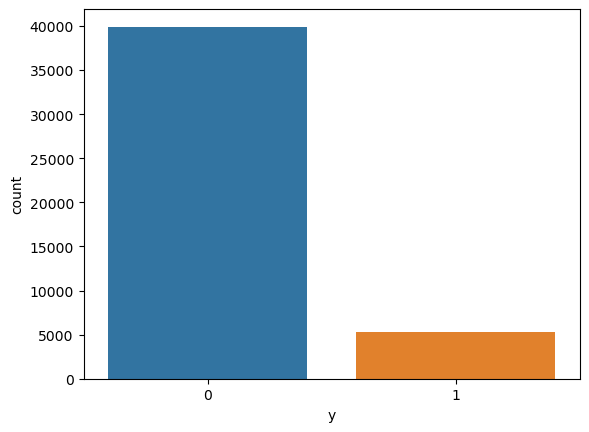

In [ ]:
import seaborn as sns
sns.countplot(x="y",data=df)

In [ ]:
df1= df[df["y"]=="yes"]
df2 =df[df["y"]=="no"]

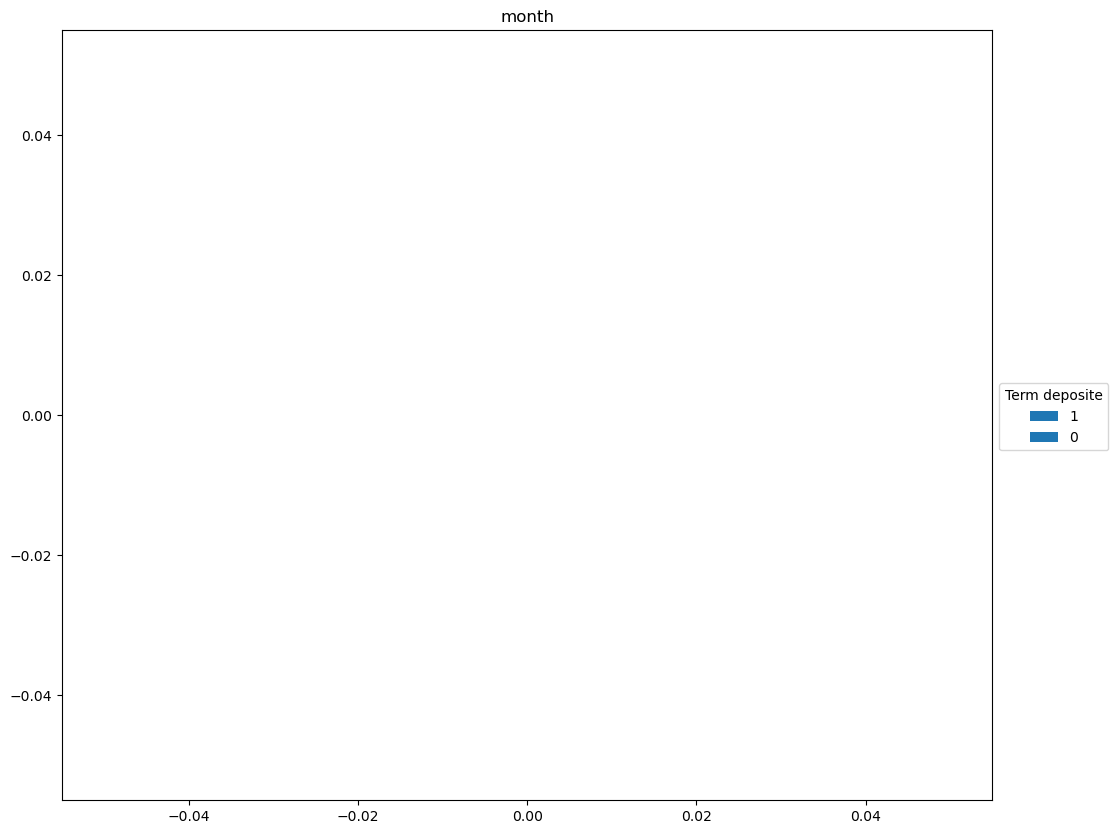

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
ax.bar(df1["month"].unique(),height=df1["month"].value_counts())
ax.bar(df2["month"].unique(),height=df1["month"].value_counts(),bottom=df1["month"].value_counts())
ax.title.set_text("month")
plt.figlegend(("1","0"),loc="right",title="Term deposite")
plt.show()

In [ ]:
df["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [ ]:
#split the variables
x=df.iloc[:,0:16]
y=df.iloc[:,16]

In [ ]:
list(x)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [ ]:
x =pd.get_dummies(x)

In [ ]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
classifier= LogisticRegression()
classifier.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#predictions
y_pred = classifier.predict(x)

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
#metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y,y_pred)
cm

array([[39279,   643],
       [ 4438,   851]], dtype=int64)

In [ ]:
ac =accuracy_score(y,y_pred)
print("Accuracy Score:",ac.round(3))

Accuracy Score: 0.888


In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score
print("Sensitivity Score:",recall_score(y,y_pred).round(3))
print("precision score:",precision_score(y,y_pred).round(3))
print("F1 Score:",f1_score(y,y_pred).round(3))

Sensitivity Score: 0.161
precision score: 0.57
F1 Score: 0.251


In [ ]:
cm

array([[39279,   643],
       [ 4438,   851]], dtype=int64)

In [ ]:
TN=cm[0,0]

In [ ]:
TN

39279

In [ ]:
FP

643

In [ ]:
print("specificity score:",(TN/(TN+FP)).round(3))

specificity score: 0.984


In [ ]:
classifier.predict_proba(x).shape

(45211, 2)

In [ ]:
y_proba = classifier.predict_proba(x)[:,1]

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
tpr,fpr,z = roc_curve(y,y_proba)

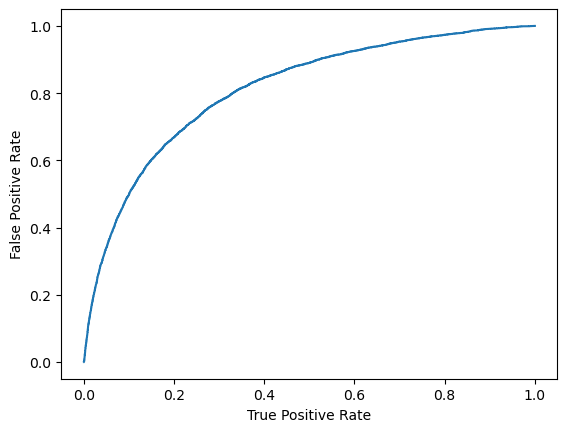

Area Under Curve: 0.811


In [ ]:
import matplotlib.pyplot as plt
plt.plot(tpr,fpr)
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()
print("Area Under Curve:",roc_auc_score(y,y_proba).round(3))